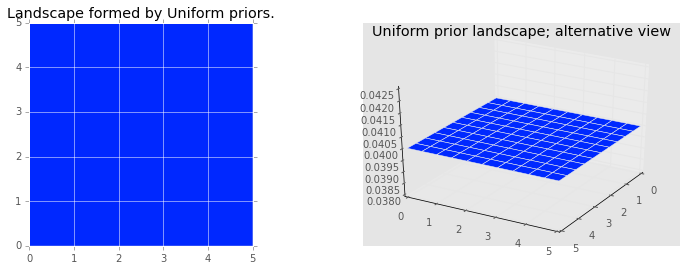

In [1]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

figsize(12.5, 4)

jet = plt.cm.jet
fig = plt.figure()
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(121)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap='jet', vmax=1, vmin=-.15, extent=(0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by Uniform priors.')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)
plt.title('Uniform prior landscape; alternative view');

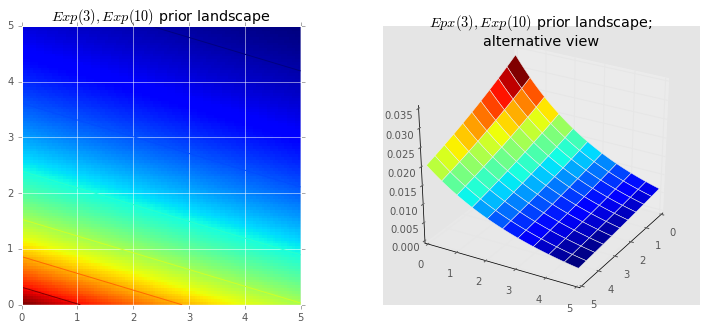

In [2]:
figsize(12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(y, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.title('$Exp(3), Exp(10)$ prior landscape')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=jet)
ax.view_init(azim=390)
plt.title('$Epx(3), Exp(10)$ prior landscape; \nalternative view');

In [3]:
N = 1

lambda_1_true = 1
lambda_2_true = 3

data= np.concatenate([
        stats.poisson.rvs(lambda_1_true, size=(N, 1)),
        stats.poisson.rvs(lambda_2_true, size=(N, 1))
    ], axis=1)
print 'observed (2-dimenstional sample size = %d):' % N, data

x = y = np.linspace(.01, 5, 100)
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x)
                        for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y)
                        for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

observed (2-dimenstional sample size = 1): [[1 1]]


(0, 5)

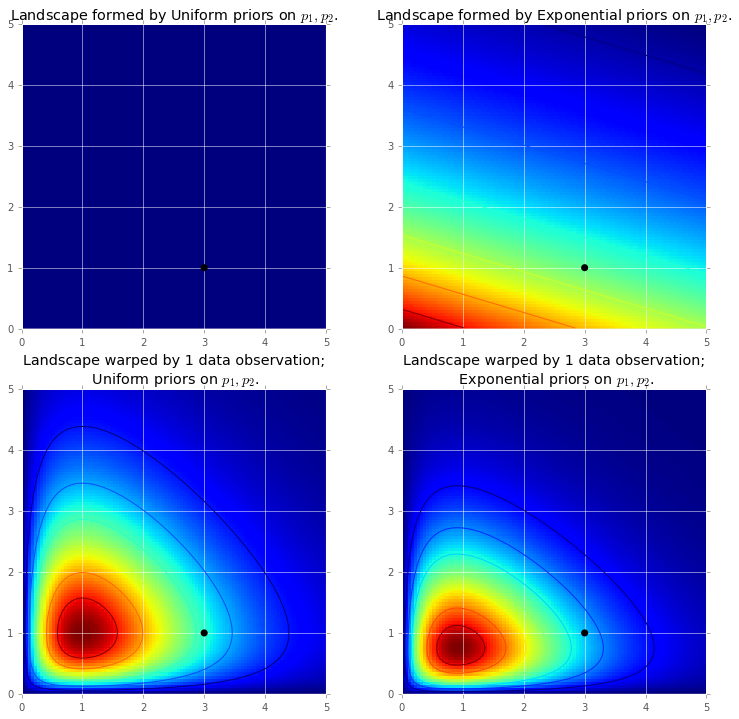

In [4]:
figsize(12.5, 12)
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(x, loc=0, scale=5)
M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, vmax=1, vmin=.15, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by Uniform priors on $p_1, p_2$.')

plt.subplot(223)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))
plt.title('Landscape warped by %d data observation;\n Uniform priors on $p_1,\
p_2$.' % N)
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.subplot(222)
exp_x = stats.expon.pdf(x, loc=0, scale=3)
exp_y = stats.expon.pdf(x, loc=0, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolors='none')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape formed by Exponential priors on $p_1, p_2$.')

plt.subplot(224)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation='none', origin='lower',
               cmap=jet, extent=(0, 5, 0, 5))

plt.scatter(lambda_2_true, lambda_1_true, c='k', s=50, edgecolor='none')
plt.title('Landscape warped by %d data observation;\n Exponential priors on \
$p_1, p_2$.' % N)
plt.xlim(0, 5)
plt.ylim(0, 5)

### Mixture model example

[ 115.85679142  152.26153716  178.87449059  162.93500815  107.02820697
  105.19141146  118.38288501  125.3769803   102.88054011  206.71326136] ...


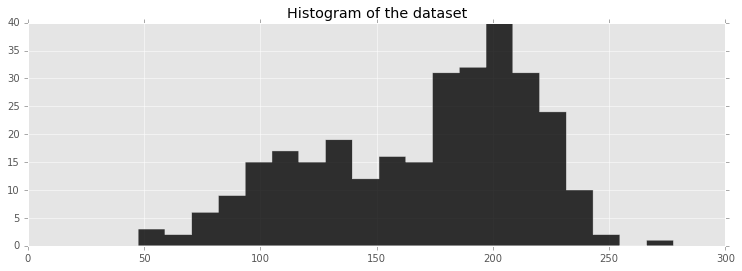

In [5]:
figsize(12.5, 4)
data = np.loadtxt('./data/mixture_data.csv', delimiter=',')

plt.hist(data, bins=20, color='k', histtype='stepfilled', alpha=0.8)
plt.title('Histogram of the dataset')
plt.ylim([0, None])
print data[:10], '...'

In [6]:
import pymc as pm

p = pm.Uniform('p', 0, 1)

assignment = pm.Categorical('assignment', [p, 1 - p], size=data.shape[0])
print 'prior assignmet, with p = %.2f:' % p.value
print assignment.value[:10], '...'

prior assignmet, with p = 0.08:
[1 1 1 1 1 1 1 0 1 0] ...


D:\soft\dev\anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [8]:
taus = 1.0 / pm.Uniform('stds', 0, 100, size=2) ** 2
centers = pm.Normal('centers', [120, 190], [0.01, 0.01], size=2)

@pm.deterministic
def center_i(assignment=assignment, centers=centers):
    return centers[assignment]
@pm.deterministic
def tau_i(assignment=assignment, taus=taus):
    return taus[assignment]

print 'Random assignment: ', assignment.value[:4], '...'
print 'Assigned center: ', center_i.value[:4], '...'
print 'Assigned precising', tau_i.value[:4], '...'

Random assignment:  [1 1 1 1] ...
Assigned center:  [ 208.20374895  208.20374895  208.20374895  208.20374895] ...
Assigned precising [ 0.00011257  0.00011257  0.00011257  0.00011257] ...


In [10]:
observations = pm.Normal('obs', center_i, tau_i, value=data, observed=True)

model = pm.Model([p, assignment, observations, taus, centers])

In [11]:
mcmc = pm.MCMC(model)
mcmc.sample(50000)

 [-----------------100%-----------------] 50000 of 50000 complete in 15.6 sec

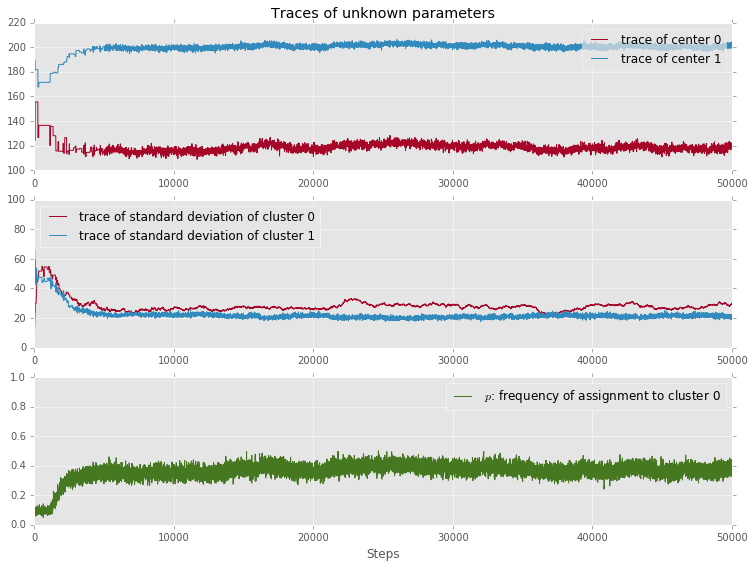

In [18]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = mcmc.trace('centers')[:]

colors = ['#348ABD', '#A60628'] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ['#A60628', '#328ABD']
    
plt.plot(center_trace[:, 0], label='trace of center 0', c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label='trace of center 1', c=colors[1], lw=lw)
plt.title('Traces of unknown parameters')
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = mcmc.trace('stds')[:]
plt.plot(std_trace[:, 0], label='trace of standard deviation of cluster 0',
        c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label='trace of standard deviation of cluster 1',
        c=colors[1], lw=lw)
plt.legend(loc='upper left')

plt.subplot(313)
p_trace = mcmc.trace('p')[:]
plt.plot(p_trace, label='$p$: frequency of assignment to cluster 0',
        color='#467821', lw=lw)
plt.xlabel('Steps')
plt.ylim(0, 1)
plt.legend();

In [19]:
mcmc.sample(100000)

 [-----------------100%-----------------] 100000 of 100000 complete in 31.8 sec

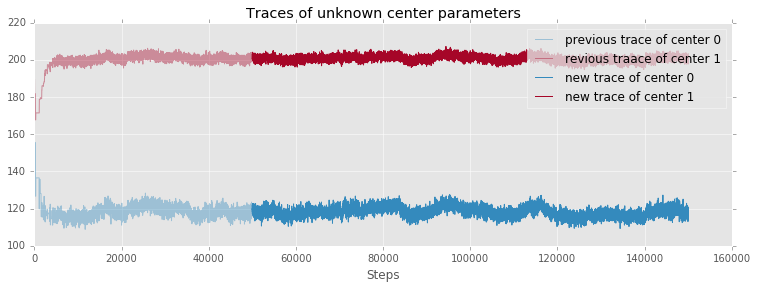

In [21]:
figsize(12.5, 4)
center_trace = mcmc.trace('centers', chain=1)[:]
prev_center_trace = mcmc.trace('centers', chain=0)[:]

x = np.arange(50000)
plt.plot(x, prev_center_trace[:, 0], label='previous trace of center 0',
        lw=lw, alpha=0.4, c=colors[1])
plt.plot(x, prev_center_trace[:, 1], label='revious traace of center 1',
        lw=lw, alpha=0.4, c=colors[0])

x = np.arange(50000, 150000)
plt.plot(x, center_trace[:, 0], label='new trace of center 0', lw=lw, c='#348ABD')
plt.plot(x, center_trace[:, 1], label='new trace of center 1', lw=lw, c='#A60628')

plt.title('Traces of unknown center parameters')
leg = plt.legend(loc='upper right')
leg.get_frame().set_alpha(0.8)
plt.xlabel('Steps');